# <center>Model Training</center>
##### <div style="text-align: right; color: purple">Pushpendra Kumar</div>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Healthcare Providers.csv')

In [3]:
df.shape

(100000, 27)

## Data Pre-processing
#### Handling Missing Values

In [4]:
# Checking missing values
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [5]:
# Dropping columns which are not needed

DropColumns = ['index', 'National Provider Identifier','Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
       'Street Address 2 of the Provider']
df = df.drop(DropColumns, axis=1)

In [6]:
# Filling missing with mode values
df["Credentials of the Provider"] = df["Credentials of the Provider"].fillna(df["Credentials of the Provider"].mode()[0])
df["Gender of the Provider"] = df["Gender of the Provider"].fillna(df["Gender of the Provider"].mode()[0])

In [7]:
df.isnull().sum()

Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average 

In [8]:
# Cleaning 'Credentials of the Provider' Column
# Removing periods '.' if present
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace('.', '')

In [9]:
df.head()

Credentials of the Provider Gender of the Provider  \
0                          MD                      F   
1                          MD                      F   
2                         DPM                      M   
3                          MD                      M   
4                          DO                      M   

  Entity Type of the Provider City of the Provider  Zip Code of the Provider  \
0                           I          SAINT LOUIS               631041004.0   
1                           I         FAYETTEVILLE               283043815.0   
2                           I          NORTH HAVEN                64732343.0   
3                           I          KANSAS CITY               641183998.0   
4                           I              JUPITER               334585700.0   

  State Code of the Provider Country Code of the Provider  \
0                         MO                           US   
1                         NC                           US   
2                         CT                           US   
3                         MO                           US   
4                         FL                           US   

             Provider Type Medicare Participation Indicator Place of Service  \
0        Internal Medicine                                Y                F   
1  Obstetrics & Gynecology                                Y                O   
2                 Podiatry                                Y                O   
3        Internal Medicine                                Y                O   
4        Internal Medicine                                Y                O   

  HCPCS Code                                  HCPCS Description  \
0      99223  Initial hospital inpatient care, typically 70 ...   
1      G0202  Screening mammography, bilateral (2-view study...   
2      99348  Established patient home visit, typically 25 m...   
3      81002                            Urinalysis, manual test   
4      96372  Injection beneath the skin or into muscle for ...   

  HCPCS Drug Indicator Number of Services Number of Medicare Beneficiaries  \
0                    N                 27                               24   
1                    N                175                              175   
2                    N                 32                               13   
3                    N                 20                               18   
4                    N                 33                               24   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount Average Submitted Charge Amount  \
0                    200.58777778                    305.21111111   
1                          123.73                           548.8   
2                           90.65                             155   
3                             3.5                               5   
4                           26.52                              40   

  Average Medicare Payment Amount Average Medicare Standardized Amount  
0                    157.26222222                         160.90888889  
1                          118.83                         135.31525714  
2                      64.4396875                           60.5959375  
3                            3.43                                 3.43  
4                    19.539393939                         19.057575758

In [10]:
# Removing 'Zip Code of the Provider' column as it was evenly distributed(Observed during EDA)
df.drop(columns=['Zip Code of the Provider'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Credentials of the Provider                               100000 non-null  object
 1   Gender of the Provider                                    100000 non-null  object
 2   Entity Type of the Provider                               100000 non-null  object
 3   City of the Provider                                      100000 non-null  object
 4   State Code of the Provider                                100000 non-null  object
 5   Country Code of the Provider                              100000 non-null  object
 6   Provider Type                                             100000 non-null  object
 7   Medicare Participation Indicator                          100000 non-null  object
 8   Place of Servic

In [12]:
df.head()

Credentials of the Provider Gender of the Provider  \
0                          MD                      F   
1                          MD                      F   
2                         DPM                      M   
3                          MD                      M   
4                          DO                      M   

  Entity Type of the Provider City of the Provider State Code of the Provider  \
0                           I          SAINT LOUIS                         MO   
1                           I         FAYETTEVILLE                         NC   
2                           I          NORTH HAVEN                         CT   
3                           I          KANSAS CITY                         MO   
4                           I              JUPITER                         FL   

  Country Code of the Provider            Provider Type  \
0                           US        Internal Medicine   
1                           US  Obstetrics & Gynecology   
2                           US                 Podiatry   
3                           US        Internal Medicine   
4                           US        Internal Medicine   

  Medicare Participation Indicator Place of Service HCPCS Code  \
0                                Y                F      99223   
1                                Y                O      G0202   
2                                Y                O      99348   
3                                Y                O      81002   
4                                Y                O      96372   

                                   HCPCS Description HCPCS Drug Indicator  \
0  Initial hospital inpatient care, typically 70 ...                    N   
1  Screening mammography, bilateral (2-view study...                    N   
2  Established patient home visit, typically 25 m...                    N   
3                            Urinalysis, manual test                    N   
4  Injection beneath the skin or into muscle for ...                    N   

  Number of Services Number of Medicare Beneficiaries  \
0                 27                               24   
1                175                              175   
2                 32                               13   
3                 20                               18   
4                 33                               24   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount Average Submitted Charge Amount  \
0                    200.58777778                    305.21111111   
1                          123.73                           548.8   
2                           90.65                             155   
3                             3.5                               5   
4                           26.52                              40   

  Average Medicare Payment Amount Average Medicare Standardized Amount  
0                    157.26222222                         160.90888889  
1                          118.83                         135.31525714  
2                      64.4396875                           60.5959375  
3                            3.43                                 3.43  
4                    19.539393939                         19.057575758

In [13]:
# Changing all needeed values to numeric

def RemoveComma(x):
    return str(x).replace(",","")  # Convert to string before replacing comma

numericCols = ['Number of Services', 'Number of Medicare Beneficiaries', 
               'Number of Distinct Medicare Beneficiary/Per Day Services', 
               'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
               'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

df[numericCols] = df[numericCols].applymap(RemoveComma).apply(pd.to_numeric, errors='ignore')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  object 
 1   Gender of the Provider                                    100000 non-null  object 
 2   Entity Type of the Provider                               100000 non-null  object 
 3   City of the Provider                                      100000 non-null  object 
 4   State Code of the Provider                                100000 non-null  object 
 5   Country Code of the Provider                              100000 non-null  object 
 6   Provider Type                                             100000 non-null  object 
 7   Medicare Participation Indicator                          100000 non-null  object 
 8   Place

### Feature Engineering

#### Ratio of Medicare Payment Amount to Submitted Charge Amount: 
###### This column would be (Average Medicare Payment Amount / Average Submitted Charge Amount), this would probably helps in providing insights into the ratio of what Medicare pays versus what providers charge on average.

In [15]:
# Adding new column as 'Ratio Medicare Payment to Submitted Charge'

# Calculating the ratio
df['Ratio Medicare Payment to Submitted Charge'] = df['Average Medicare Payment Amount'] / df['Average Submitted Charge Amount']

In [16]:
df.head()

Credentials of the Provider Gender of the Provider  \
0                          MD                      F   
1                          MD                      F   
2                         DPM                      M   
3                          MD                      M   
4                          DO                      M   

  Entity Type of the Provider City of the Provider State Code of the Provider  \
0                           I          SAINT LOUIS                         MO   
1                           I         FAYETTEVILLE                         NC   
2                           I          NORTH HAVEN                         CT   
3                           I          KANSAS CITY                         MO   
4                           I              JUPITER                         FL   

  Country Code of the Provider            Provider Type  \
0                           US        Internal Medicine   
1                           US  Obstetrics & Gynecology   
2                           US                 Podiatry   
3                           US        Internal Medicine   
4                           US        Internal Medicine   

  Medicare Participation Indicator Place of Service HCPCS Code  \
0                                Y                F      99223   
1                                Y                O      G0202   
2                                Y                O      99348   
3                                Y                O      81002   
4                                Y                O      96372   

                                   HCPCS Description HCPCS Drug Indicator  \
0  Initial hospital inpatient care, typically 70 ...                    N   
1  Screening mammography, bilateral (2-view study...                    N   
2  Established patient home visit, typically 25 m...                    N   
3                            Urinalysis, manual test                    N   
4  Injection beneath the skin or into muscle for ...                    N   

   Number of Services  Number of Medicare Beneficiaries  \
0                27.0                                24   
1               175.0                               175   
2                32.0                                13   
3                20.0                                18   
4                33.0                                24   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27          
1                                                175          
2                                                 32          
3                                                 20          
4                                                 31          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                       200.587778                       305.211111   
1                       123.730000                       548.800000   
2                        90.650000                       155.000000   
3                         3.500000                         5.000000   
4                        26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  \
0                       157.262222                            160.908889   
1                       118.830000                            135.315257   
2                        64.439688                             60.595937   
3                         3.430000                              3.430000   
4                        19.539394                             19.057576   

   Ratio Medicare Payment to Submitted Charge  
0                                    0.515257  
1                                    0.216527  
2                                    0.415740  
3                                    0.686000  
4                                    0.488485

## Encoding

### One-hot Encoding

In [17]:
# Identify columns to be one-hot encoded
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']

# Perform one-hot encoding
df_one_hot = pd.get_dummies(df, columns=categorical_cols)

In [18]:
df_one_hot.head()

Number of Services  Number of Medicare Beneficiaries  \
0                27.0                                24   
1               175.0                               175   
2                32.0                                13   
3                20.0                                18   
4                33.0                                24   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27          
1                                                175          
2                                                 32          
3                                                 20          
4                                                 31          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                       200.587778                       305.211111   
1                       123.730000                       548.800000   
2                        90.650000                       155.000000   
3                         3.500000                         5.000000   
4                        26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  \
0                       157.262222                            160.908889   
1                       118.830000                            135.315257   
2                        64.439688                             60.595937   
3                         3.430000                              3.430000   
4                        19.539394                             19.057576   

   Ratio Medicare Payment to Submitted Charge  \
0                                    0.515257   
1                                    0.216527   
2                                    0.415740   
3                                    0.686000   
4                                    0.488485   

   Credentials of the Provider_A-NP  Credentials of the Provider_A/ACNP-BC  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   HCPCS Description_X-ray of upper digestive tract, kidneys, urinary ducts (ureters), and bladder with contrast  \
0                                              False                                                               
1                                              False                                                               
2                                              False                                                               
3                                              False                                                               
4                                              False                                                               

   HCPCS Description_X-ray of upper spine, 4 or 5 views  \
0                                              False      
1                                              False      
2                                              False      
3                                              False      
4                                              False      

   HCPCS Description_X-ray of upper spine, 6 or more views  \
0                                              False         
1                                              False         
2                                              False         
3                                              False         
4                                              False         

   HCPCS Description_X-ray of wrist, 2 views  \
0                                      False   
1                                      

#### One-hot encoding creates huge number of columns i.e., 12641 columns which are unneccessary and creates further difficulties. 

### Binary Encoding

In [19]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

BEcols = [var for var in df.columns if df[var].dtype == "O"]

# Create a DataFrame for binary encoding
df_bin_enc = df.copy()

#Performing binary encoding
for col in BEcols:
        encoder = ce.BinaryEncoder(cols = [col])
        dfbin = encoder.fit_transform(df[col])
        df_bin_enc = pd.concat([df_bin_enc,dfbin], axis = 1)
        df_bin_enc.drop(columns=[col], inplace=True)
        

In [20]:
df_bin_enc.head()

Number of Services  Number of Medicare Beneficiaries  \
0                27.0                                24   
1               175.0                               175   
2                32.0                                13   
3                20.0                                18   
4                33.0                                24   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27          
1                                                175          
2                                                 32          
3                                                 20          
4                                                 31          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                       200.587778                       305.211111   
1                       123.730000                       548.800000   
2                        90.650000                       155.000000   
3                         3.500000                         5.000000   
4                        26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  \
0                       157.262222                            160.908889   
1                       118.830000                            135.315257   
2                        64.439688                             60.595937   
3                         3.430000                              3.430000   
4                        19.539394                             19.057576   

   Ratio Medicare Payment to Submitted Charge  Credentials of the Provider_0  \
0                                    0.515257                              0   
1                                    0.216527                              0   
2                                    0.415740                              0   
3                                    0.686000                              0   
4                                    0.488485                              0   

   Credentials of the Provider_1  ...  HCPCS Description_4  \
0                              0  ...                    0   
1                              0  ...                    0   
2                              0  ...                    0   
3                              0  ...                    0   
4                              0  ...                    0   

   HCPCS Description_5  HCPCS Description_6  HCPCS Description_7  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   HCPCS Description_8  HCPCS Description_9  HCPCS Description_10  \
0                    0                    0                     0   
1                    0                    0                     1   
2                    0                    0                     1   
3                    0                    1                     0   
4                    0                    1                     0   

   HCPCS Description_11  HCPCS Drug Indicator_0  HCPCS Drug Indicator_1  
0                     1                       0                       1  
1                     0                       0                       1  
2                     1                       0                       1  
3                     0                       0                       1  
4                     1                       0                       1  

[5 rows x 82 columns]

##### After encoding using binary encoded technique we get 82 columns only.

### Frequency Encoding

In [21]:
# Identify columns to be frequency encoded (assuming all categorical columns)
FEcols = [var for var in df.columns if df[var].dtype == "O"]

# Create a DataFrame for frequency encoding
df_freq_enc = df.copy()

# Performing frequency encoding
for col in FEcols:
    encoder = ce.CountEncoder(cols=[col])
    df_fe = encoder.fit_transform(df[col])
    df_freq_enc[col] = df_fe[col]

In [22]:
df_freq_enc.head()

Credentials of the Provider  Gender of the Provider  \
0                        73827                   29105   
1                        73827                   29105   
2                         1915                   70895   
3                        73827                   70895   
4                         6176                   70895   

   Entity Type of the Provider  City of the Provider  \
0                        95746                   500   
1                        95746                   209   
2                        95746                    10   
3                        95746                   317   
4                        95746                    51   

   State Code of the Provider  Country Code of the Provider  Provider Type  \
0                        1997                         99994          11366   
1                        3725                         99994           1028   
2                        1403                         99994           2027   
3                        1997                         99994          11366   
4                        7263                         99994          11366   

   Medicare Participation Indicator  Place of Service  HCPCS Code  \
0                             99969             38384        1297   
1                             99969             61616         243   
2                             99969             61616          44   
3                             99969             61616         460   
4                             99969             61616         732   

   HCPCS Description  HCPCS Drug Indicator  Number of Services  \
0               1297                 93802                27.0   
1                243                 93802               175.0   
2                 44                 93802                32.0   
3                460                 93802                20.0   
4                732                 93802                33.0   

   Number of Medicare Beneficiaries  \
0                                24   
1                               175   
2                                13   
3                                18   
4                                24   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27          
1                                                175          
2                                                 32          
3                                                 20          
4                                                 31          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                       200.587778                       305.211111   
1                       123.730000                       548.800000   
2                        90.650000                       155.000000   
3                         3.500000                         5.000000   
4                        26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  \
0                       157.262222                            160.908889   
1                       118.830000                            135.315257   
2                        64.439688                             60.595937   
3                         3.430000                              3.430000   
4                        19.539394                             19.057576   

   Ratio Medicare Payment to Submitted Charge  
0                                    0.515257  
1                                    0.216527  
2                                    0.415740  
3                                    0.686000  
4                                    0.488485

# Model Training

## Isolation Forest

In [23]:
from sklearn.ensemble import IsolationForest

if_model = IsolationForest(n_estimators=1000, max_samples='auto', contamination='auto', random_state=42)
if_model.fit(df_freq_enc)

IsolationForest(n_estimators=1000, random_state=42)

In [24]:
# Checking the frequency counts of anomalies
pd.value_counts(if_model.predict(df_freq_enc))

 1    86310
-1    13690
Name: count, dtype: int64

#### Since, there are lot of anomalies if we are going with default settings. So, we have to set the contamination as 0.01 which is 1% of the whole dataset.

In [25]:
if_model = IsolationForest(n_estimators=1000, max_samples='auto', contamination=0.01, random_state=42)
if_model.fit(df_freq_enc)

IsolationForest(contamination=0.01, n_estimators=1000, random_state=42)

In [26]:
df['IF_anomalies_scores'] = if_model.decision_function(df_freq_enc)
df['IF_anomaly'] = if_model.predict(df_freq_enc)

In [27]:
df.head()

Credentials of the Provider Gender of the Provider  \
0                          MD                      F   
1                          MD                      F   
2                         DPM                      M   
3                          MD                      M   
4                          DO                      M   

  Entity Type of the Provider City of the Provider State Code of the Provider  \
0                           I          SAINT LOUIS                         MO   
1                           I         FAYETTEVILLE                         NC   
2                           I          NORTH HAVEN                         CT   
3                           I          KANSAS CITY                         MO   
4                           I              JUPITER                         FL   

  Country Code of the Provider            Provider Type  \
0                           US        Internal Medicine   
1                           US  Obstetrics & Gynecology   
2                           US                 Podiatry   
3                           US        Internal Medicine   
4                           US        Internal Medicine   

  Medicare Participation Indicator Place of Service HCPCS Code  ...  \
0                                Y                F      99223  ...   
1                                Y                O      G0202  ...   
2                                Y                O      99348  ...   
3                                Y                O      81002  ...   
4                                Y                O      96372  ...   

  Number of Services Number of Medicare Beneficiaries  \
0               27.0                               24   
1              175.0                              175   
2               32.0                               13   
3               20.0                               18   
4               33.0                               24   

   Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27          
1                                                175          
2                                                 32          
3                                                 20          
4                                                 31          

   Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                       200.587778                       305.211111   
1                       123.730000                       548.800000   
2                        90.650000                       155.000000   
3                         3.500000                         5.000000   
4                        26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  \
0                       157.262222                            160.908889   
1                       118.830000                            135.315257   
2                        64.439688                             60.595937   
3                         3.430000                              3.430000   
4                        19.539394                             19.057576   

   Ratio Medicare Payment to Submitted Charge  IF_anomalies_scores  IF_anomaly  
0                                    0.515257             0.113256           1  
1                                    0.216527             0.165581           1  
2                                    0.415740             0.206793           1  
3                                    0.686000             0.195335           1  
4                                    0.488485             0.175494           1  

[5 rows x 22 columns]

In [28]:
# Checking the frequency counts of anomalies
pd.value_counts(df['IF_anomaly'])

IF_anomaly
 1    99000
-1     1000
Name: count, dtype: int64

### Viewing Outliers

In [29]:
df_freq_enc.loc[df['IF_anomaly']== -1, :]

Credentials of the Provider  Gender of the Provider  \
122                          73827                   70895   
221                          73827                   70895   
340                          73827                   70895   
375                          73827                   70895   
439                          73827                   29105   
...                            ...                     ...   
99857                        73827                   70895   
99864                         6176                   70895   
99914                        73827                   70895   
99927                        73827                   70895   
99932                        73827                   70895   

       Entity Type of the Provider  City of the Provider  \
122                          95746                   110   
221                          95746                   592   
340                           4254                   298   
375                          95746                   244   
439                          95746                   406   
...                            ...                   ...   
99857                        95746                   658   
99864                        95746                   156   
99914                         4254                     5   
99927                        95746                    19   
99932                        95746                    23   

       State Code of the Provider  Country Code of the Provider  \
122                          3333                         99994   
221                          1997                         99994   
340                           787                         99994   
375                          1994                         99994   
439                          1753                         99994   
...                           ...                           ...   
99857                        4561                         99994   
99864                        3663                         99994   
99914                        7775                         99994   
99927                        7775                         99994   
99932                        6361                         99994   

       Provider Type  Medicare Participation Indicator  Place of Service  \
122             3098                             99969             38384   
221              447                             99969             38384   
340              512                             99969             38384   
375              999                             99969             61616   
439             1745                             99969             61616   
...              ...                               ...               ...   
99857           1667                             99969             38384   
99864           3098                             99969             38384   
99914            512                             99969             38384   
99927            143                             99969             38384   
99932          12537                             99969             61616   

       HCPCS Code  HCPCS Description  HCPCS Drug Indicator  \
122            71                 72                 93802   
221            17                 27                 93802   
340            19                 19                 93802   
375             3                 10                 93802   
439            24                 24                  6198   
...           ...                ...                   ...   
99857           6                  6                 93802   
99864         111                122                 93802   
99914          13                 13                 93802   
99927          26                 26                 93802   
99932           8                  8                 93802   

       Number of Services  Number of Medicare Beneficiaries  \
122            

### Outliers Visualization

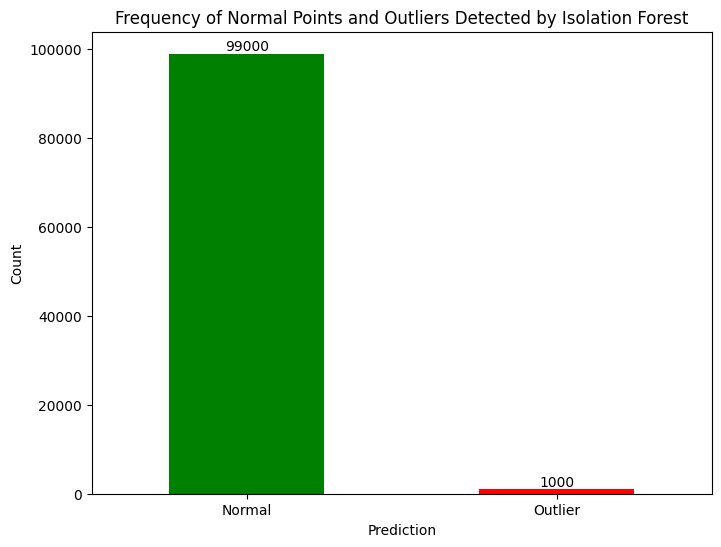

In [30]:
# Plotting the bar plot of outliers of whole dataset
plt.figure(figsize=(8, 6))
pd.value_counts(df['IF_anomaly']).plot(kind='bar', color=['g', 'r'])
plt.title('Frequency of Normal Points and Outliers Detected by Isolation Forest')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Outlier'], rotation=0)

# Adding counts over bars
for i, count in enumerate(pd.value_counts(df['IF_anomaly'])):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')
    
plt.show()

### Scatter Plots for different Columns

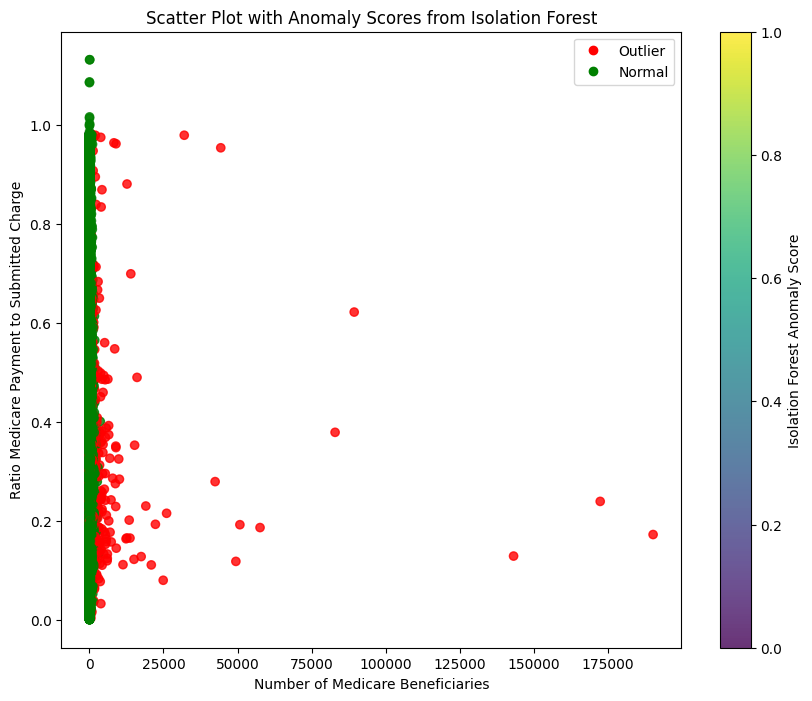

In [31]:
plt.figure(figsize=(10, 8))

# Scatter plot with anomaly scores as color
plt.scatter(df['Number of Medicare Beneficiaries'], df['Ratio Medicare Payment to Submitted Charge'], 
            c=np.where(df['IF_anomaly'] == -1, 'r', 'g'), alpha=0.8)
plt.colorbar(label='Isolation Forest Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Isolation Forest')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')

legend_labels = {'r': 'Outlier', 'g': 'Normal'}
handles = [plt.Line2D([0,0],[0,0],marker='o', color=color, linestyle='') for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='best')

plt.show()

<div class="alert alert-bloxk alert-info">
    <b>Insights:</b> The above scatter plot shows that almost all anomalies are outliers which are present outside the range of the "Number of Beneficiaries".
</div>

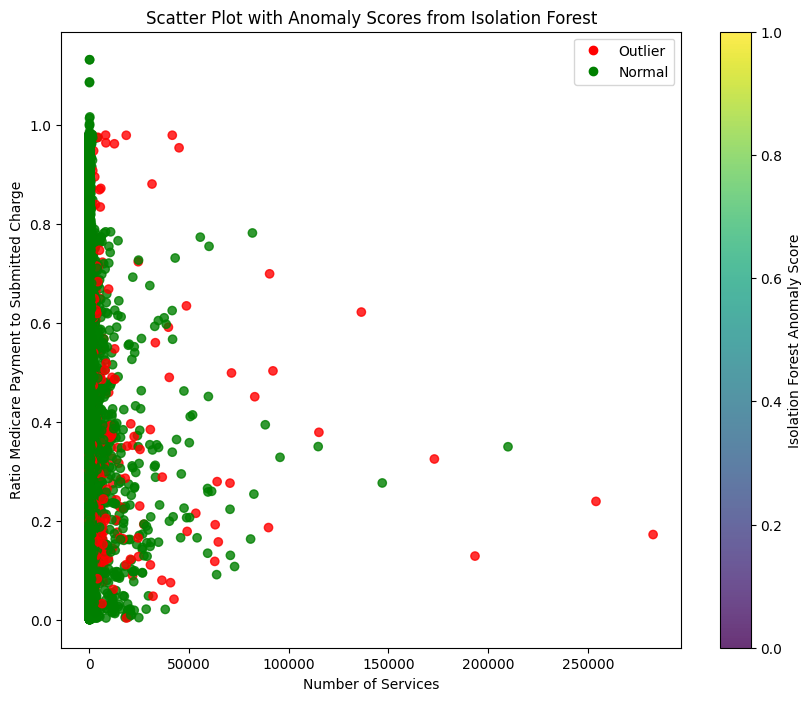

In [32]:
plt.figure(figsize=(10, 8))

# Scatter plot with anomaly scores as color
plt.scatter(df['Number of Services'], df['Ratio Medicare Payment to Submitted Charge'], 
            c=np.where(df['IF_anomaly'] == -1, 'r', 'g'), alpha=0.8)
plt.colorbar(label='Isolation Forest Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Isolation Forest')
plt.xlabel('Number of Services')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')

legend_labels = {'r': 'Outlier', 'g': 'Normal'}
handles = [plt.Line2D([0,0],[0,0],marker='o', color=color, linestyle='') for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='best')

plt.show()

<div class="alert alert-bloxk alert-info">
    <b>Insights:</b> The above scatter plot among "Number of Beneficiaries" and "Ratio Medicare Payment to Submitted Charge" shows that most data clusters are present in the lower left part and when the "Number of Services" increasing the anomalies are increasing gradually.
</div>

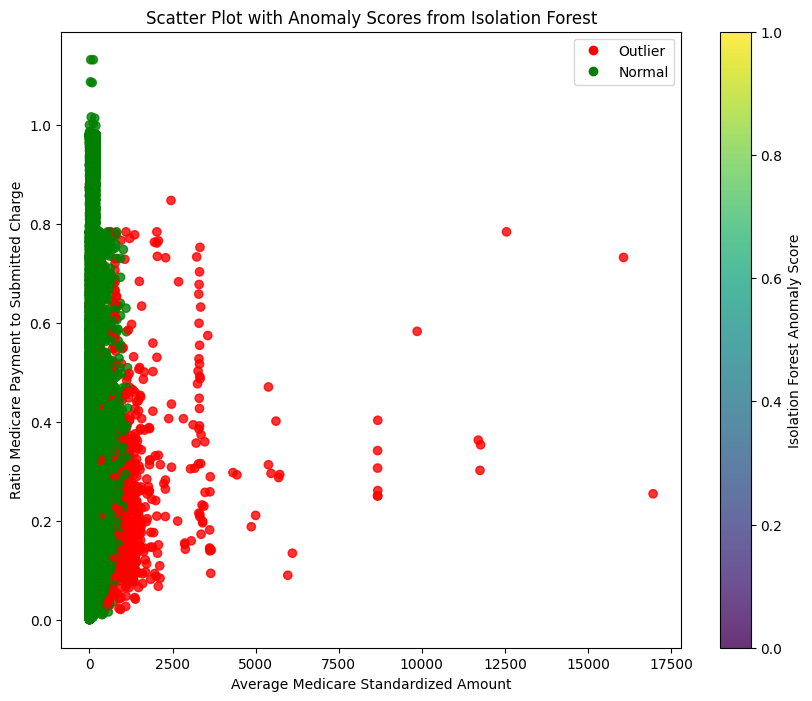

In [35]:
plt.figure(figsize=(10, 8))

# Scatter plot with anomaly scores as color
plt.scatter(df['Average Medicare Standardized Amount'], df['Ratio Medicare Payment to Submitted Charge'], 
            c=np.where(df['IF_anomaly'] == -1, 'r', 'g'), alpha=0.8)
plt.colorbar(label='Isolation Forest Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Isolation Forest')
plt.xlabel('Average Medicare Standardized Amount')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')

legend_labels = {'r': 'Outlier', 'g': 'Normal'}
handles = [plt.Line2D([0,0],[0,0],marker='o', color=color, linestyle='') for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='best')

plt.show()

<div class="alert alert-bloxk alert-info">
    <b>Insights:</b> The above scatter plot shows that the ouliers cluster is mostly formed when the 'Average Medicare Standardized Amount' and 'Ratio Medicare Payment to Submitted Charge' are smaller and they begin to scatter when both of them tends to increase.
</div>

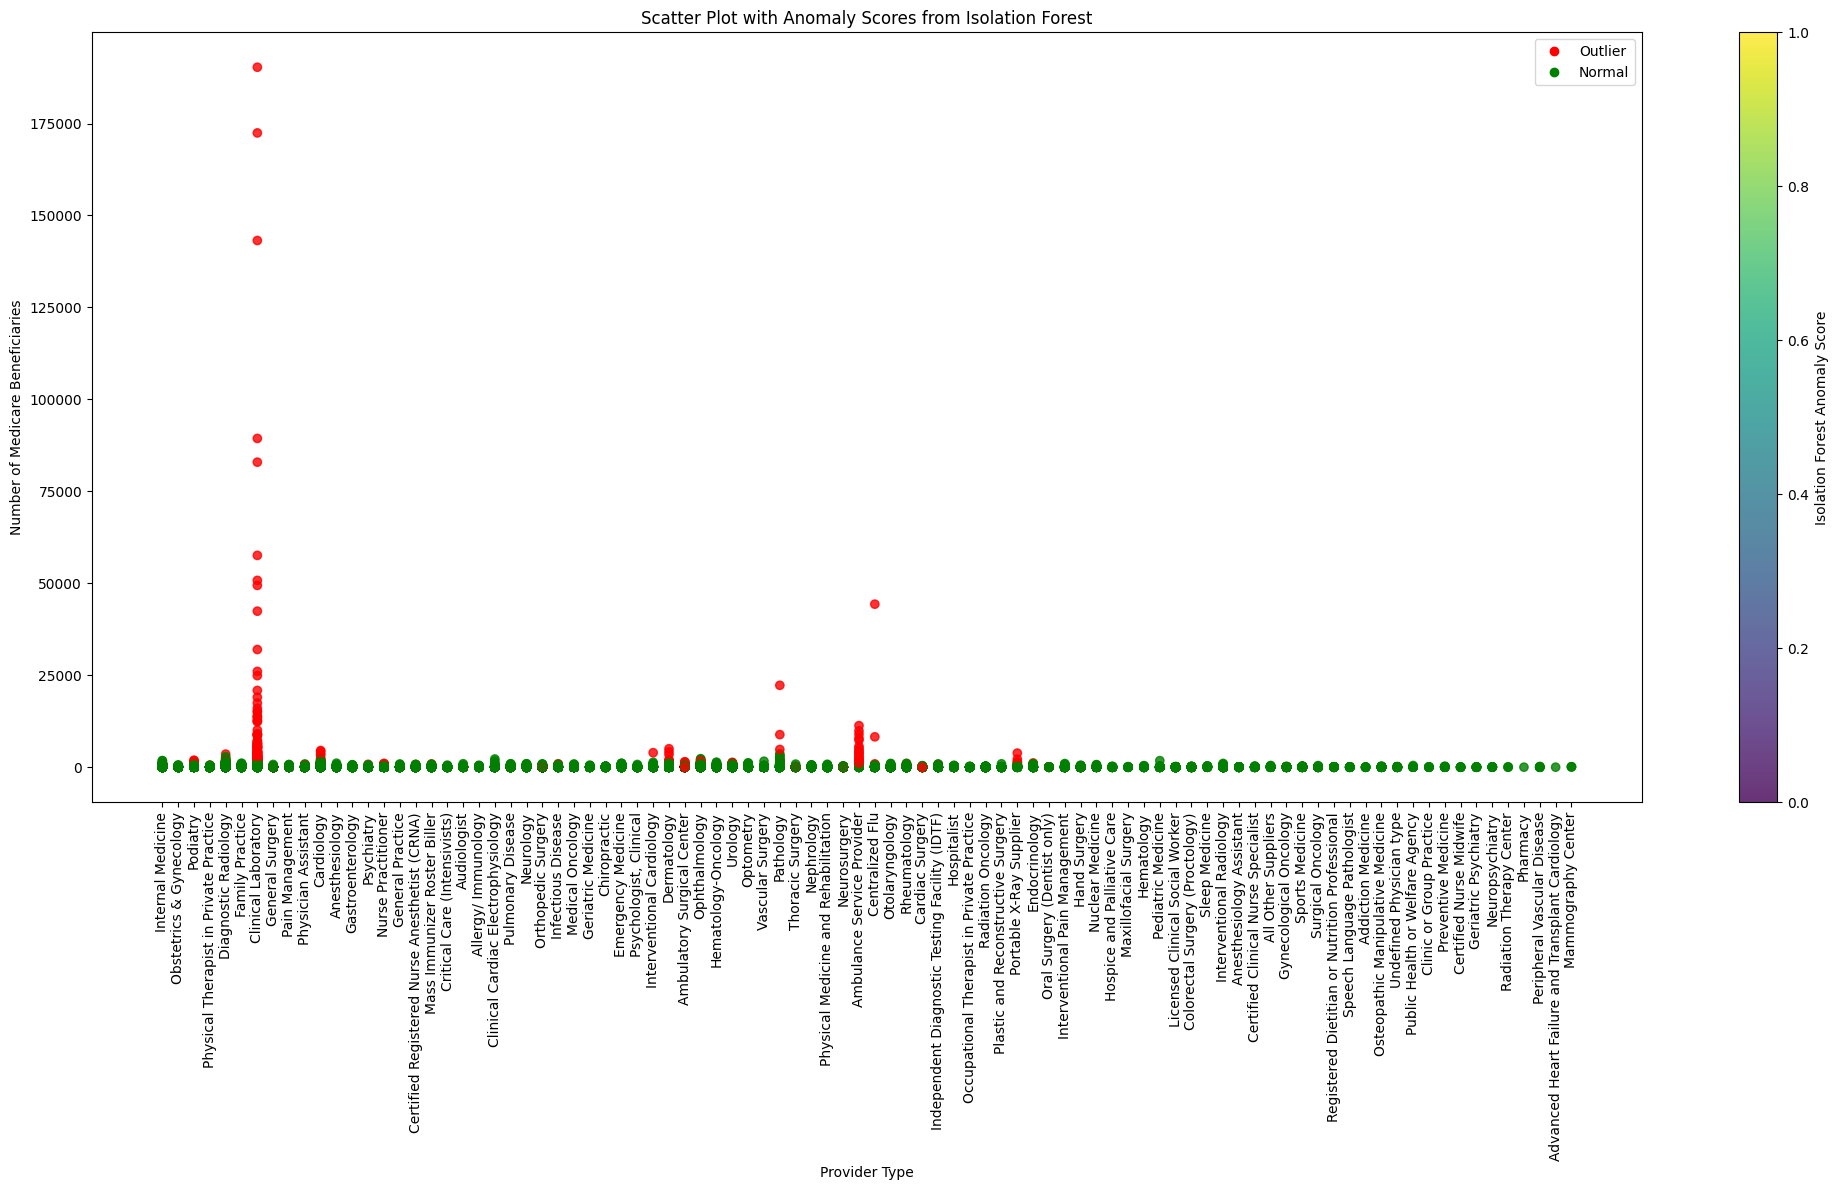

In [37]:
plt.figure(figsize=(25, 10))

# Scatter plot with anomaly scores as color
plt.scatter(df['Provider Type'], df['Number of Medicare Beneficiaries'], 
            c=np.where(df['IF_anomaly'] == -1, 'r', 'g'), alpha=0.8)
plt.colorbar(label='Isolation Forest Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Isolation Forest')
plt.xlabel('Provider Type')
plt.ylabel('Number of Medicare Beneficiaries')

legend_labels = {'r': 'Outlier', 'g': 'Normal'}
handles = [plt.Line2D([0,0],[0,0],marker='o', color=color, linestyle='') for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='best')
plt.xticks(rotation=90) 

plt.show()

<div class="alert alert-bloxk alert-info">
    <b>Insights:</b> The above scatter plot shows that the ouliers between "Provider Type" and "Number of Services". The most number of ouliers are present in "Clinical Laboratory" followed by "Ambulance Service Provider", Dermatology", "Cardiology", "Portable X-Ray Supplier", and so on.
</div>

## Elliptic Envelope

In [38]:
from sklearn.covariance import EllipticEnvelope
# Now fit an Elliptic Envelope to identify outliers
envelope = EllipticEnvelope(contamination=0.01)
envelope.fit(df_freq_enc)

EllipticEnvelope(contamination=0.01)

In [39]:
df['EE_anomalies_scores'] = envelope.decision_function(df_freq_enc)
df['EE_anomaly'] = envelope.predict(df_freq_enc)

In [40]:
df.head()

Credentials of the Provider Gender of the Provider  \
0                          MD                      F   
1                          MD                      F   
2                         DPM                      M   
3                          MD                      M   
4                          DO                      M   

  Entity Type of the Provider City of the Provider State Code of the Provider  \
0                           I          SAINT LOUIS                         MO   
1                           I         FAYETTEVILLE                         NC   
2                           I          NORTH HAVEN                         CT   
3                           I          KANSAS CITY                         MO   
4                           I              JUPITER                         FL   

  Country Code of the Provider            Provider Type  \
0                           US        Internal Medicine   
1                           US  Obstetrics & Gynecology   
2                           US                 Podiatry   
3                           US        Internal Medicine   
4                           US        Internal Medicine   

  Medicare Participation Indicator Place of Service HCPCS Code  ...  \
0                                Y                F      99223  ...   
1                                Y                O      G0202  ...   
2                                Y                O      99348  ...   
3                                Y                O      81002  ...   
4                                Y                O      96372  ...   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount  Average Submitted Charge Amount  \
0                      200.587778                       305.211111   
1                      123.730000                       548.800000   
2                       90.650000                       155.000000   
3                        3.500000                         5.000000   
4                       26.520000                        40.000000   

   Average Medicare Payment Amount  Average Medicare Standardized Amount  \
0                       157.262222                            160.908889   
1                       118.830000                            135.315257   
2                        64.439688                             60.595937   
3                         3.430000                              3.430000   
4                        19.539394                             19.057576   

   Ratio Medicare Payment to Submitted Charge  IF_anomalies_scores  \
0                                    0.515257             0.113256   
1                                    0.216527             0.165581   
2                                    0.415740             0.206793   
3                                    0.686000             0.195335   
4                                    0.488485             0.175494   

   IF_anomaly  EE_anomalies_scores  EE_anomaly  
0           1        142483.299249           1  
1           1        142409.283784           1  
2           1        142495.440125           1  
3           1        142492.535321           1  
4           1        142496.959476           1  

[5 rows x 24 columns]

In [41]:
# Checking the frequency counts of anomalies
pd.value_counts(df['EE_anomaly'])

EE_anomaly
 1    99000
-1     1000
Name: count, dtype: int64

<div class="alert alert-block alert-warning">
    <b>Note:</b> The number of anomalies detected in Elliptic Envelope is 1000 by setting contamination as '0.01' which is 1% of the total dataset. 
</div>

### Visualization of Elliptic Envelope Anomalies using Scatter Plots

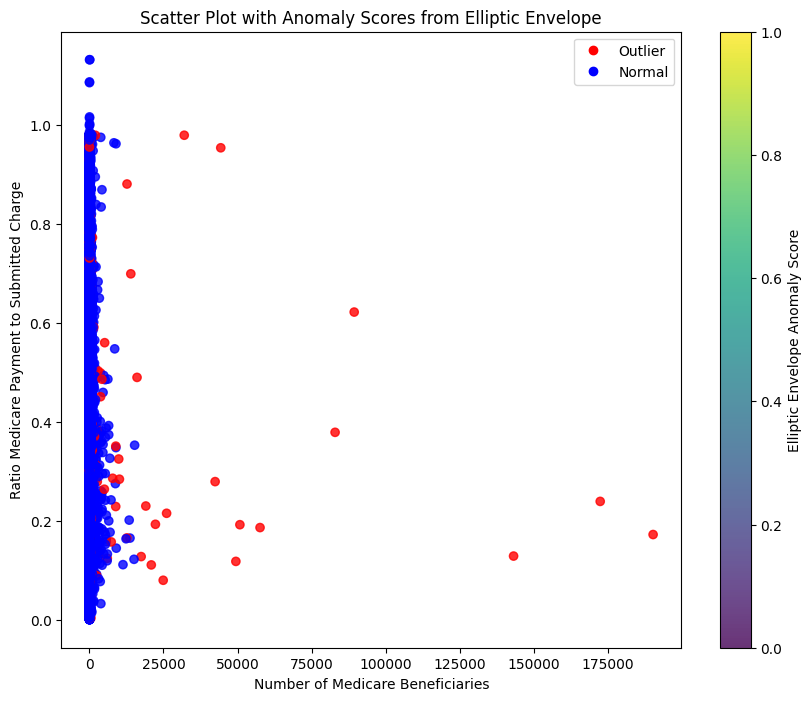

In [45]:
plt.figure(figsize=(10, 8))

# Scatter plot with anomaly scores as color
plt.scatter(df_freq_enc['Number of Medicare Beneficiaries'], df_freq_enc['Ratio Medicare Payment to Submitted Charge'], 
            c=np.where(df['EE_anomaly'] == -1, 'r', 'b'), alpha=0.8)
plt.colorbar(label='Elliptic Envelope Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Elliptic Envelope')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')

legend_labels = {'r': 'Outlier', 'b': 'Normal'}
handles = [plt.Line2D([0,0],[0,0],marker='o', color=color, linestyle='') for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='best')

plt.show()

<div class="alert alert-bloxk alert-info">
    <b>Insights:</b> The above scatter plot shows that the outliers points are scattered subsequently when the "Number of Medicare Beneficiaries" starts increasing.
</div>

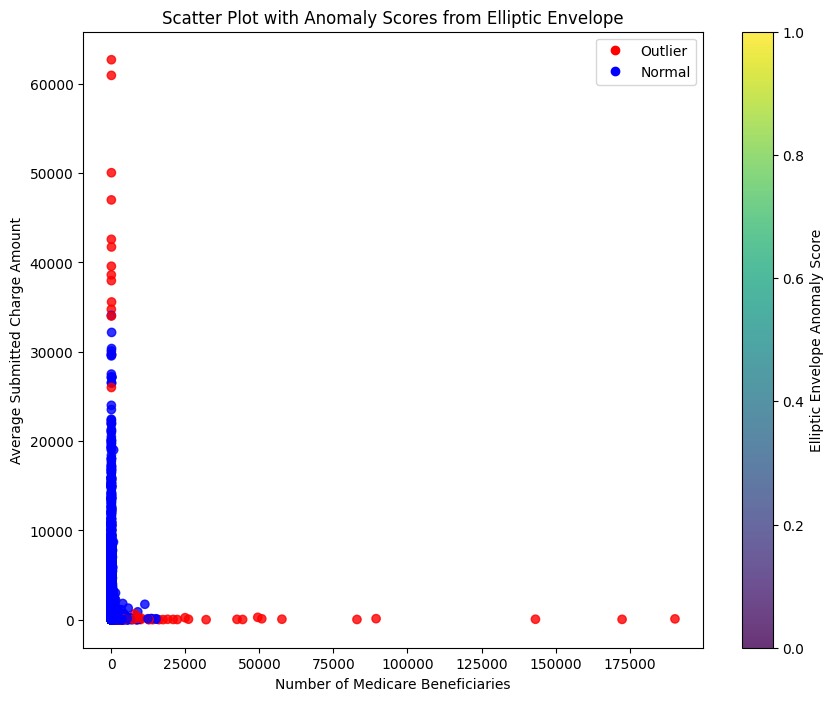

In [46]:
plt.figure(figsize=(10, 8))

# Scatter plot with anomaly scores as color
plt.scatter(df_freq_enc['Number of Medicare Beneficiaries'], df_freq_enc['Average Submitted Charge Amount'], 
            c=np.where(df['EE_anomaly'] == -1, 'r', 'b'), alpha=0.8)
plt.colorbar(label='Elliptic Envelope Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Elliptic Envelope')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Average Submitted Charge Amount')

legend_labels = {'r': 'Outlier', 'b': 'Normal'}
handles = [plt.Line2D([0,0],[0,0],marker='o', color=color, linestyle='') for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='best')

plt.show()


<div class="alert alert-bloxk alert-info">
    <b>Insights:</b> The above scatter plot shows that the outliers increases with the increase in the "Number of Medicare Beneficiaries as well as the "Average Submitted Charge Amount".
</div>

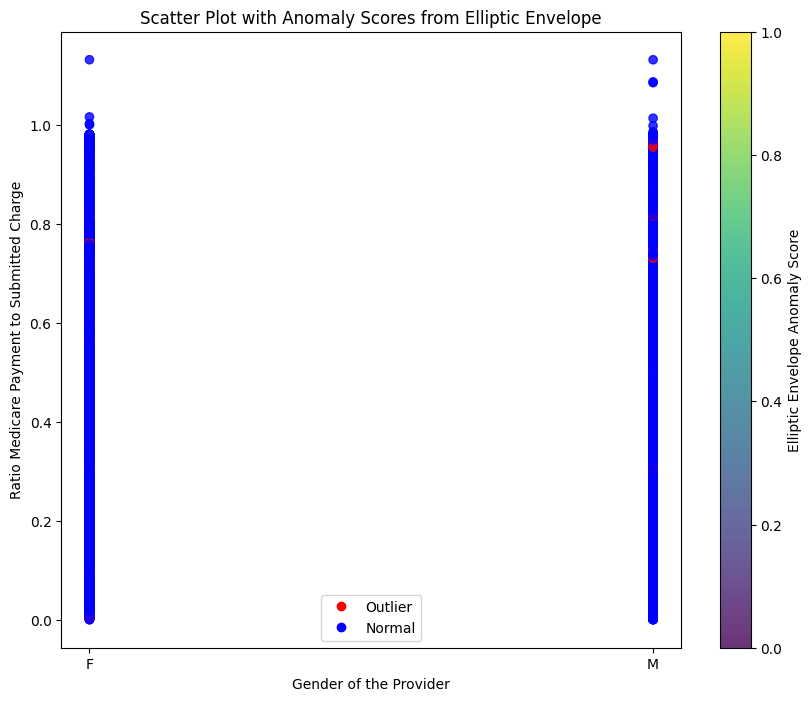

In [47]:
plt.figure(figsize=(10, 8))

# Scatter plot with anomaly scores as color
plt.scatter(df['Gender of the Provider'], df_freq_enc['Ratio Medicare Payment to Submitted Charge'], 
            c=np.where(df['EE_anomaly'] == -1, 'r', 'b'), alpha=0.8)
plt.colorbar(label='Elliptic Envelope Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Elliptic Envelope')
plt.xlabel('Gender of the Provider')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')

legend_labels = {'r': 'Outlier', 'b': 'Normal'}
handles = [plt.Line2D([0,0],[0,0],marker='o', color=color, linestyle='') for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='best')

plt.show()


<div class="alert alert-bloxk alert-info">
    <b>Insights:</b> The above scatter plot between "Gender of the Provider" and "Ratio Medicare Payment to Submitted Charge" shows that the outliers are mostly present in 'Male' column and the 'Female' has very less or minimal number of anomalies.
</div>

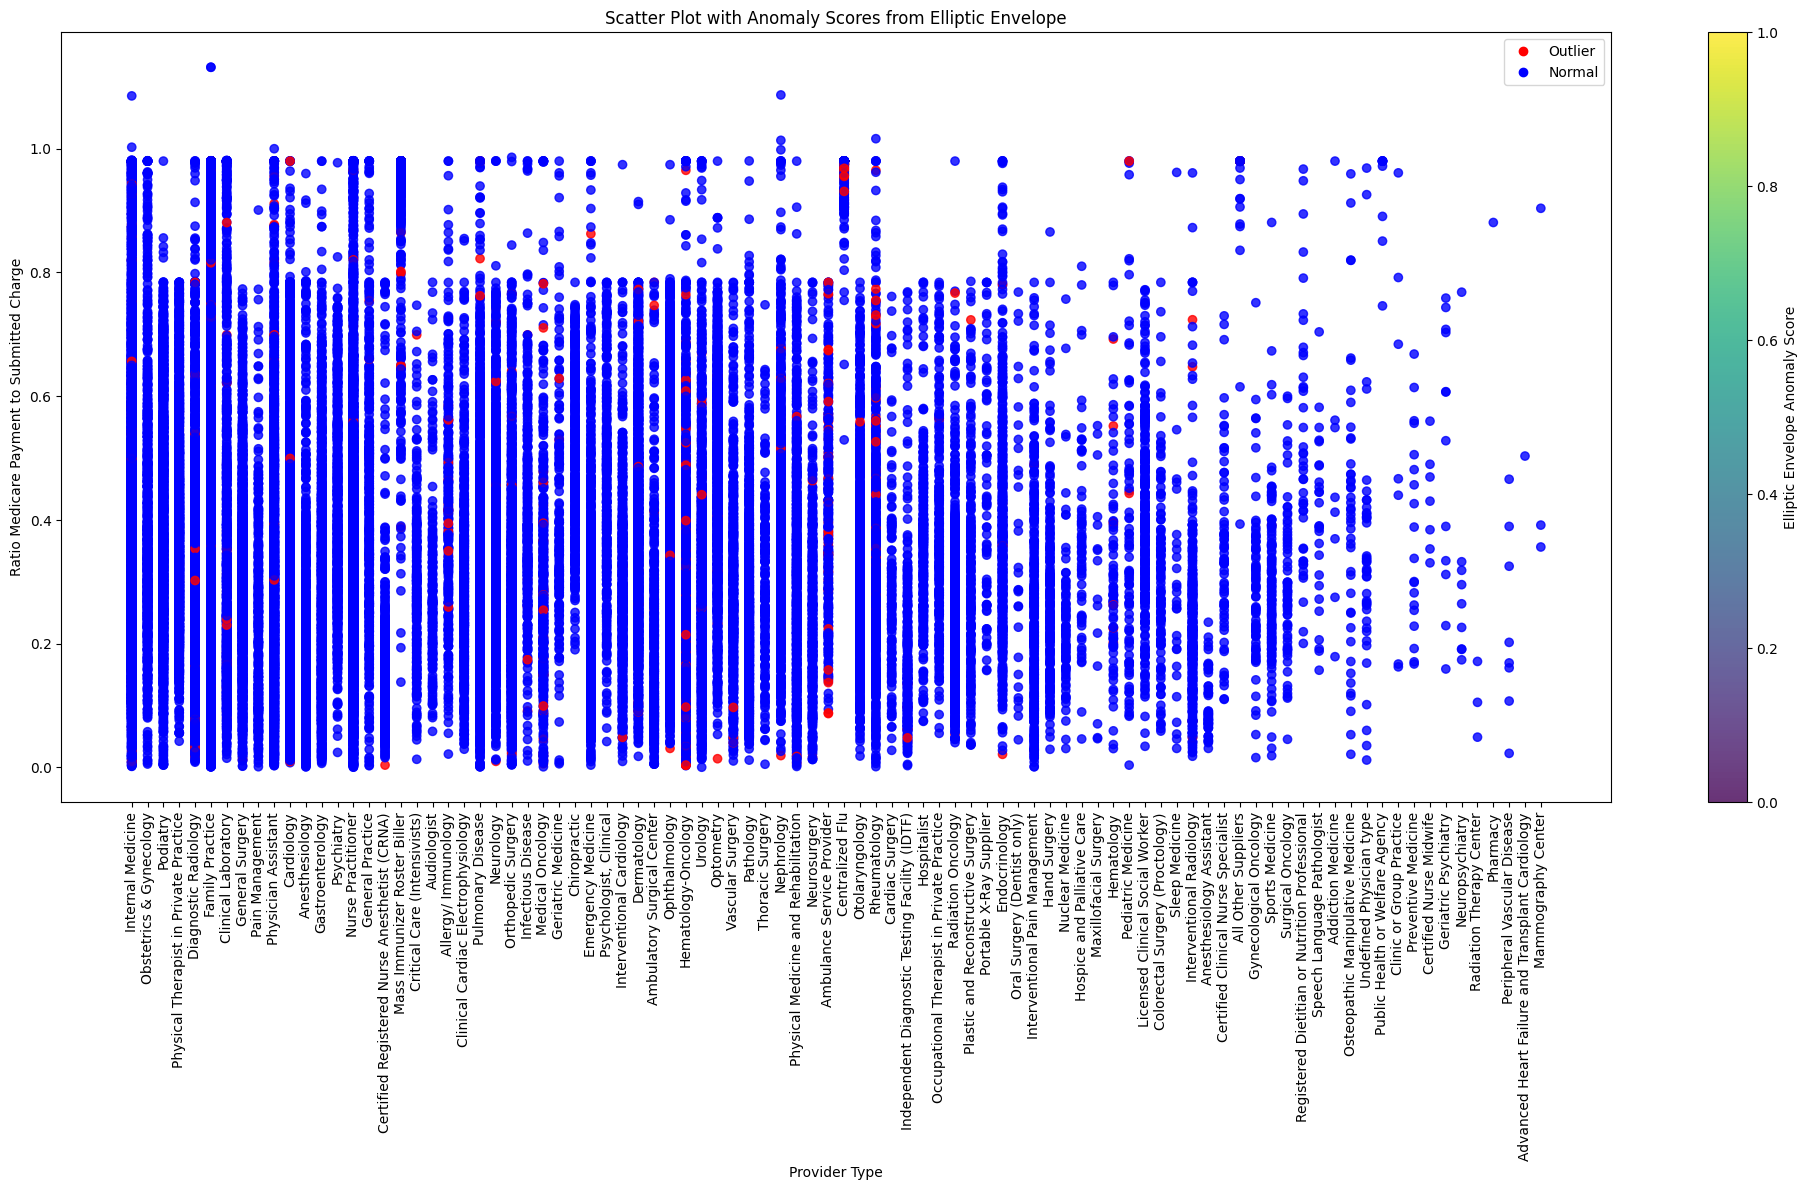

In [48]:
plt.figure(figsize=(25, 10))

# Scatter plot with anomaly scores as color
plt.scatter(df['Provider Type'], df['Ratio Medicare Payment to Submitted Charge'], 
            c=np.where(df['EE_anomaly'] == -1, 'r', 'b'), alpha=0.8)
plt.colorbar(label='Elliptic Envelope Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Elliptic Envelope')
plt.xlabel('Provider Type')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')

legend_labels = {'r': 'Outlier', 'b': 'Normal'}
handles = [plt.Line2D([0,0],[0,0],marker='o', color=color, linestyle='') for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='best')
plt.xticks(rotation=90)

plt.show()


<div class="alert alert-bloxk alert-info">
    <b>Insights:</b> The above scatter plot shows that the outliers are scattered among most of the "Provider Type", the most number of anomalies are present in 'Rheumatology', 'Ambulance Service Provider', 'Hematology-Oncology', 'Medical-Oncology', 'Allergy/Immunology', and so on.
</div>

## One Class Support Vector Machine

In [49]:
stscaler = StandardScaler().fit(df_freq_enc)
df_std = pd.DataFrame(stscaler.transform(df_freq_enc))

In [50]:
df_std

0         1         2         3         4         5         6   \
0      0.594983 -1.560716  0.210784  1.571686 -0.737342  0.007746  1.336743   
1      0.594983 -1.560716  0.210784  0.189180 -0.004973  0.007746 -0.940500   
2     -1.684316  0.640731  0.210784 -0.756245 -0.989093  0.007746 -0.720441   
3      0.594983  0.640731  0.210784  0.702275 -0.737342  0.007746  1.336743   
4     -1.549260  0.640731  0.210784 -0.561459  1.494517  0.007746  1.336743   
...         ...       ...       ...       ...       ...       ...       ...   
99995 -1.709831 -1.560716  0.210784  0.730781  0.142517  0.007746 -0.554571   
99996 -1.729577 -1.560716  0.210784 -0.737242 -1.140399  0.007746  0.091506   
99997  0.594983  0.640731  0.210784  1.571686 -0.737342  0.007746 -0.153223   
99998  0.594983 -1.560716  0.210784 -0.775249  1.112228  0.007746  1.336743   
99999  0.594983 -1.560716  0.210784 -0.475943  1.112228  0.007746 -0.554571   

            7         8         9         10        11        12        13  \
0      0.01761 -1.266985  0.397579  0.389268  0.257051 -0.085301 -0.059308   
1      0.01761  0.789275 -0.439989 -0.450300  0.257051 -0.025939  0.076775   
2      0.01761  0.789275 -0.598126 -0.608815  0.257051 -0.083296 -0.069222   
3      0.01761  0.789275 -0.267549 -0.277448  0.257051 -0.088109 -0.064716   
4      0.01761  0.789275 -0.051402 -0.060785  0.257051 -0.082895 -0.059308   
...        ...       ...       ...       ...       ...       ...       ...   
99995  0.01761  0.789275 -0.370854 -0.381000  0.257051 -0.088109 -0.062913   
99996  0.01761  0.789275  3.004848  3.002764  0.257051 -0.041582  0.015493   
99997  0.01761 -1.266985 -0.573492 -0.584122  0.257051 -0.091719 -0.071024   
99998  0.01761  0.789275  0.514394  0.506362  0.257051 -0.091318 -0.070123   
99999  0.01761  0.789275 -0.379595 -0.389762  0.257051  0.140114 -0.012445   

             14        15        16        17        18        19  
0     -0.070183  0.385450 -0.046433  0.400082  0.414299  0.871094  
1      0.020049  0.086673  0.182805  0.207649  0.286359 -0.592234  
2     -0.067135 -0.041922 -0.187794 -0.064687 -0.087154  0.383609  
3     -0.074451 -0.380709 -0.328957 -0.370166 -0.372921  1.707476  
4     -0.067744 -0.291221 -0.296019 -0.289505 -0.294800  0.739950  
...         ...       ...       ...       ...       ...       ...  
99995 -0.074451 -0.062438 -0.132270 -0.083284 -0.078893 -0.262873  
99996 -0.003729 -0.156134 -0.198097 -0.237098 -0.204907 -0.632525  
99997 -0.079938 -0.324419 -0.230571 -0.316791 -0.316983 -1.022833  
99998 -0.079328 -0.275594 -0.272492 -0.237479 -0.263495  0.602678  
99999  0.271235 -0.244257 -0.289556 -0.238446 -0.260535  1.455141  

[100000 rows x 20 columns]

In [51]:
from sklearn import svm
from sklearn.svm import OneClassSVM

# Applying One Class SVM
clf=svm.OneClassSVM(nu = 0.01, kernel = 'rbf', gamma = 0.01)
clf.fit(df_std)

SVM_predict = clf.predict(df_std)
SVM_outliers = df_std[SVM_predict == -1]

SVM_outliers

0         1         2         3         4           5         6   \
122    0.594983  0.640731  0.210784 -0.281157 -0.171113    0.007746 -0.484523   
145    0.594983 -1.560716  0.210784 -0.537705  1.711515    0.007746  1.336743   
221    0.594983  0.640731  0.210784  2.008767 -0.737342    0.007746 -1.068482   
259    0.594983  0.640731  0.210784 -0.794252 -1.581176 -129.096002  1.594689   
375    0.594983  0.640731  0.210784  0.355461 -0.738613    0.007746 -0.946888   
...         ...       ...       ...       ...       ...         ...       ...   
99828  0.594983 -1.560716  0.210784  4.236930  1.112228    0.007746  1.336743   
99872  0.594983  0.640731  0.210784  1.096598  0.349344    0.007746 -1.006804   
99914  0.594983  0.640731 -4.744185 -0.779999  1.711515    0.007746 -1.054164   
99927  0.594983  0.640731  0.210784 -0.713487  1.711515    0.007746 -1.135447   
99932  0.594983  0.640731  0.210784 -0.694484  1.112228    0.007746  1.594689   

            7         8         9         10        11         12        13  \
122    0.01761 -1.266985 -0.576670 -0.586511  0.257051  -0.083697 -0.053000   
145    0.01761 -1.266985  3.004848  3.002764  0.257051  -0.064846 -0.026865   
221    0.01761 -1.266985 -0.619582 -0.622356  0.257051  -0.090917 -0.069222   
259    0.01761  0.789275 -0.326353 -0.336393  0.257051  -0.083296 -0.052099   
375    0.01761  0.789275 -0.630707 -0.635898  0.257051  -0.090917 -0.069222   
...        ...       ...       ...       ...       ...        ...       ...   
99828  0.01761  0.789275  2.864194  2.861774  0.257051  -0.069258 -0.056605   
99872  0.01761  0.789275 -0.628323 -0.639084 -3.890275  17.150956 -0.068321   
99914  0.01761 -1.266985 -0.622760 -0.633508  0.257051  -0.082494 -0.058407   
99927  0.01761 -1.266985 -0.612430 -0.623153  0.257051  -0.091719 -0.071024   
99932  0.01761  0.789275 -0.626734 -0.637491  0.257051  -0.089714 -0.067419   

             14         15         16         17         18        19  
122   -0.067744   5.551071   7.853780   7.235806   4.965014 -0.795665  
145   -0.039090  -0.199479  -0.222144  -0.242857  -0.237229 -0.460054  
221   -0.078719   6.162538   6.052223   5.775609   6.759159 -0.764352  
259   -0.067135  -0.352059  -0.267786  -0.349406  -0.348968 -1.122715  
375   -0.078719  11.665209   7.086433  11.790492  11.943792 -0.141875  
...         ...        ...        ...        ...        ...       ...  
99828 -0.045796   0.074078  -0.145445   0.023973  -0.022029  0.359082  
99872 -0.017751  -0.365232  -0.326134  -0.358054  -0.360828  1.928533  
99914 -0.065915  13.622009   7.665563  13.766480   9.976914 -0.023841  
99927 -0.079938   6.125303   4.696250   6.038030   6.280069 -0.476785  
99932 -0.076890  70.017110  43.897346  70.714930  58.344977 -0.172879  

[1002 rows x 20 columns]

In [52]:
#Printing all column names with their indices
for idx, col in enumerate(df_freq_enc.columns):
    print(f"Column {idx}: {col}")

Column 0: Credentials of the Provider
Column 1: Gender of the Provider
Column 2: Entity Type of the Provider
Column 3: City of the Provider
Column 4: State Code of the Provider
Column 5: Country Code of the Provider
Column 6: Provider Type
Column 7: Medicare Participation Indicator
Column 8: Place of Service
Column 9: HCPCS Code
Column 10: HCPCS Description
Column 11: HCPCS Drug Indicator
Column 12: Number of Services
Column 13: Number of Medicare Beneficiaries
Column 14: Number of Distinct Medicare Beneficiary/Per Day Services
Column 15: Average Medicare Allowed Amount
Column 16: Average Submitted Charge Amount
Column 17: Average Medicare Payment Amount
Column 18: Average Medicare Standardized Amount
Column 19: Ratio Medicare Payment to Submitted Charge


### Visualization of SVM outliers

Number of Inliers: 98998
Number of Outliers: 1002


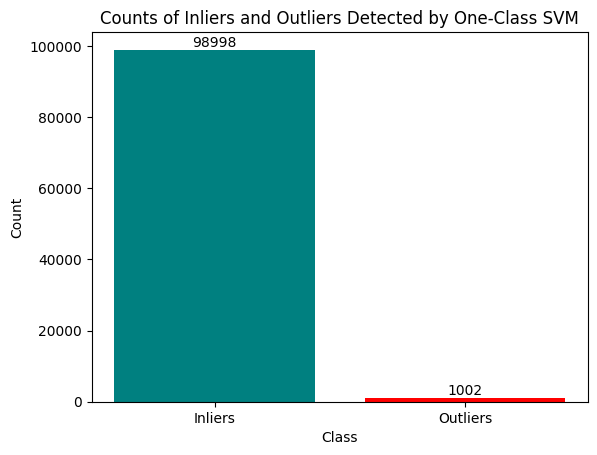

In [53]:
from collections import Counter

# Calculate counts of inliers and outliers
counter = Counter(SVM_predict)
inliers_count = counter[1]
outliers_count = counter[-1]

# Print count of predictions (inliers and outliers)
print("Number of Inliers:", inliers_count)
print("Number of Outliers:", outliers_count)

# Plotting the bar chart
labels = ['Inliers', 'Outliers']
counts = [inliers_count, outliers_count]

plt.bar(labels, counts, color=['teal', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts of Inliers and Outliers Detected by One-Class SVM')

# Adding text annotations
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Showing the plot
plt.show()

<div class="alert alert-block alert-warning">
    <b>Note:</b> The number of anomalies detected by One Class SVM is 1002 by setting nu value as '0.01' which is approximately 1% of the total dataset. 
</div>

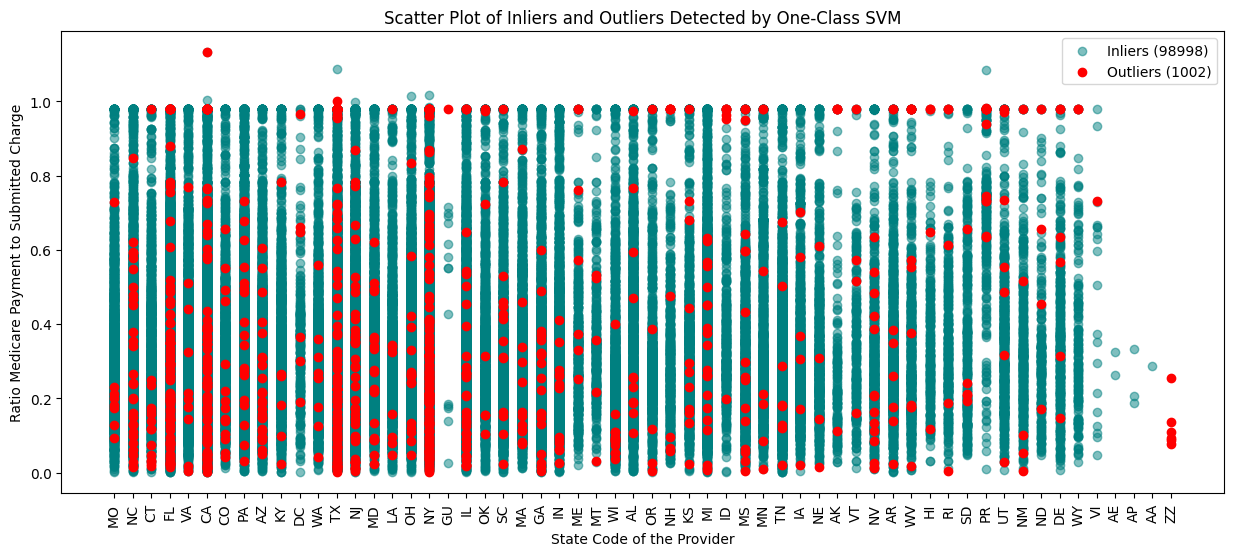

In [61]:
# Extract inliers and outliers
inliers = df[SVM_predict == 1]
outliers = df[SVM_predict == -1]

# Plotting the scatter plots
plt.figure(figsize=(15, 6))

# Plotting inliers
plt.scatter(inliers.iloc[:, 4], inliers.iloc[:, 19], label=f'Inliers ({inliers_count})', color='teal', alpha=0.5)

# Plotting outliers
plt.scatter(outliers.iloc[:, 4], outliers.iloc[:, 19], label=f'Outliers ({outliers_count})', color='red')

# Adding labels and title
plt.xlabel("State Code of the Provider")
plt.ylabel("Ratio Medicare Payment to Submitted Charge")
plt.title("Scatter Plot of Inliers and Outliers Detected by One-Class SVM")

plt.legend()
plt.xticks(rotation=90)

plt.show()

<div class="alert alert-block alert-info">
    <b>Insights:</b> The above scatter plot is between "State Code of the Provider" and "Ratio Medicare Payment to Submitted Charge", it shows that the state codes (NY, CA, FL, TX) has largest number of anomalies. Also, all the state code (ZZ) values are detected as anomalies by One Class SVM Model.
</div>

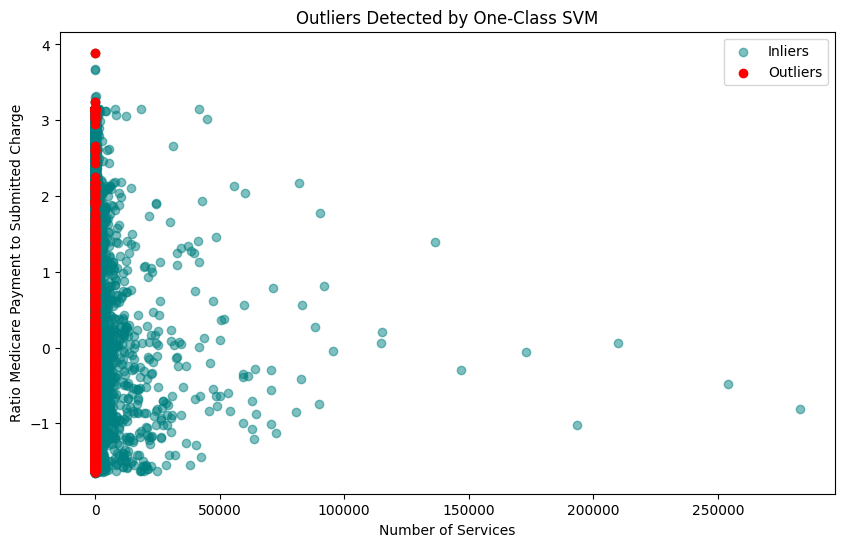

In [67]:
# Plotting the graph
plt.figure(figsize=(10, 6))

# Plotting all data points
plt.scatter(df.iloc[:, 12], df_std.iloc[:, 19], color='teal', label='Inliers', alpha=0.5)

# Plotting outliers detected by One-Class SVM in red
plt.scatter(SVM_outliers.iloc[:, 12], SVM_outliers.iloc[:, 19], color='red', label='Outliers')

# Adding labels and title
plt.xlabel("Number of Services")
plt.ylabel("Ratio Medicare Payment to Submitted Charge")
plt.title("Outliers Detected by One-Class SVM")

# Adding legend
plt.legend()

# Showing the plot
plt.show()

<div class="alert alert-block alert-info">
    <b>Insights:</b> The above scatter plot shows that the anomalies are present only when "Number of Services" are on lower side.
</div>

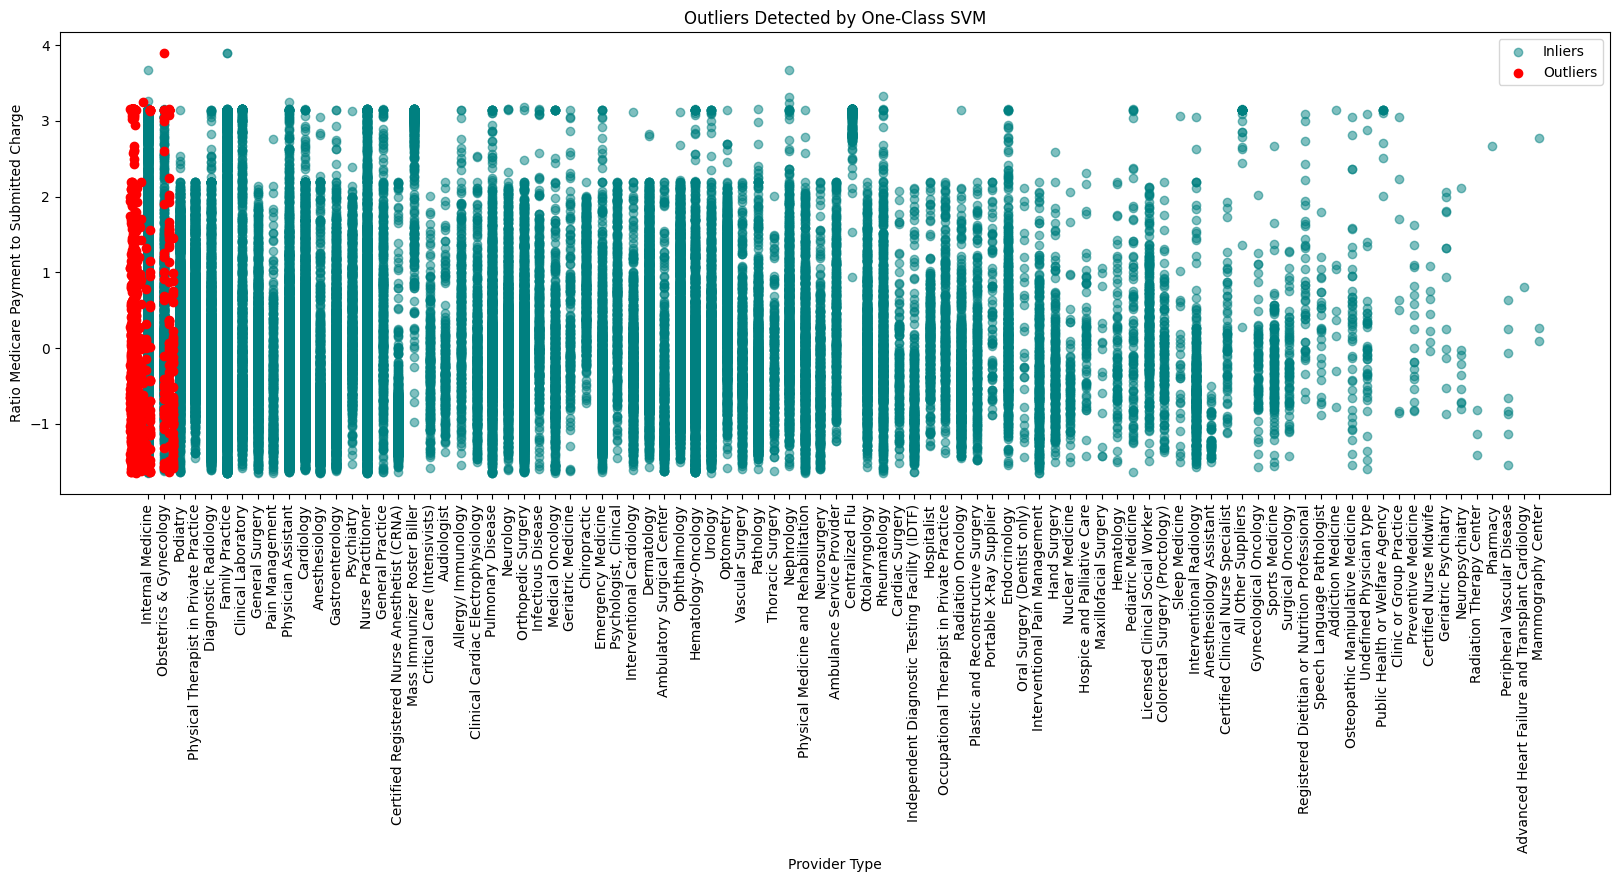

In [68]:
# Plotting the graph
plt.figure(figsize=(20, 6))

# Plotting all data points
plt.scatter(df.iloc[:, 6], df_std.iloc[:, 19], color='teal', label='Inliers', alpha=0.5)

# Plotting outliers detected by One-Class SVM in red
plt.scatter(SVM_outliers.iloc[:, 6], SVM_outliers.iloc[:, 19], color='red', label='Outliers')

# Adding labels and title
plt.xlabel("Provider Type")
plt.ylabel("Ratio Medicare Payment to Submitted Charge")
plt.title("Outliers Detected by One-Class SVM")
plt.legend()
plt.xticks(rotation=90)
# Showing the plot
plt.show()

<div class="alert alert-block alert-info">
    <b>Insights:</b> The above scatter plot shows that the most number of anomalies are present in the 'Internal Medicine', 'Obstetrics & Gynecology, and Podiatry. The rest all provider types are almost anomalies free.
</div>

# SHAP ANALYSIS

<div class="alert alert-block alert-danger">
    <b>Note:</b> "Here, we are creating a random sample of 1000 rows with a 'random_state' value because SHAP analysis takes too much time to process the entire dataset of 100,000 rows."
</div>

### Isolation Forest SHAP Analysis

In [70]:
import shap
shap.initjs()

IF_explainer = shap.Explainer(if_model)

# Creating a sample size of 1000 for SHAP analysis
IFshap_X = shap.sample(df_freq_enc, 1000, random_state=18)
IF_shap_values = IF_explainer.shap_values(IFshap_X)

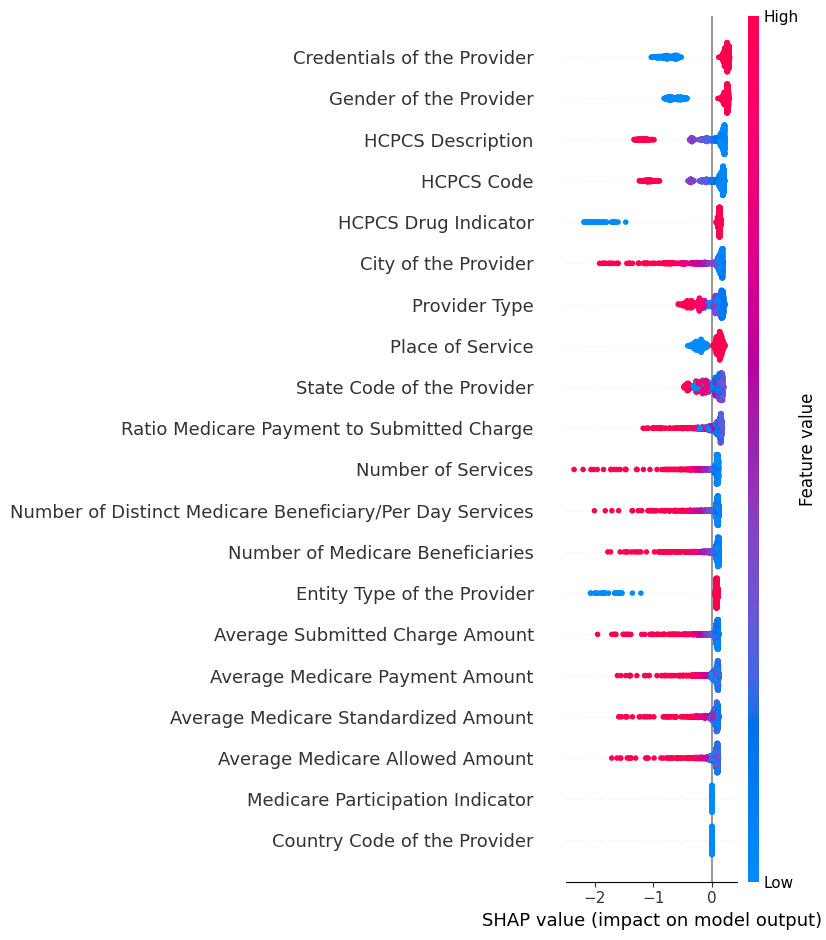

In [71]:
shap.summary_plot(IF_shap_values, IFshap_X)

<b>The following attributes have the highest positive impact on the output:</b>
<ul>
    <li>Credentials of the Provider
    <li>Gender of the Provider
    <li>HCPS Drug Indicator
    <li>Place of Service
    <li>Entity Type of the Provider
</ul>
<br>
<b>The following attributes have the highest negative impact on the output:</b>
<ul>
    <li>City of the Provider
    <li>Number of Services
    <li>Number of Distinct Medicare Beneficiary/Per Day Services
    <li>Number of Medicare Beneficiaries
    <li>Average Medicare Allowed Amount
    <li>Average Submitted Charge Amount
    <li>Average Medicare Payment Amount
    <li>Average Medicare Standardized Amount
</ul>

### SHAP Dependence Plots for particular features (Isolation Forest)

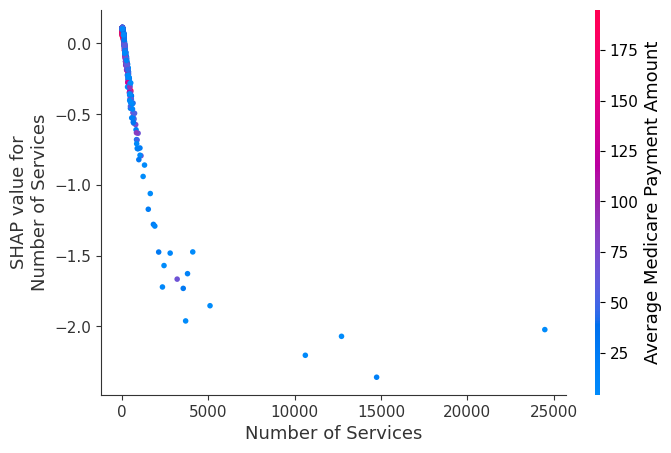

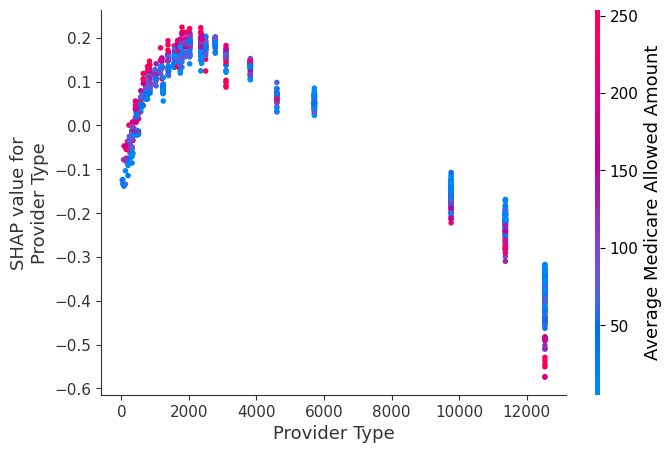

In [166]:
shap.dependence_plot("Number of Services", IF_shap_values, IFshap_X)
print('\n\n\n\n')
shap.dependence_plot("Provider Type", IF_shap_values, IFshap_X)

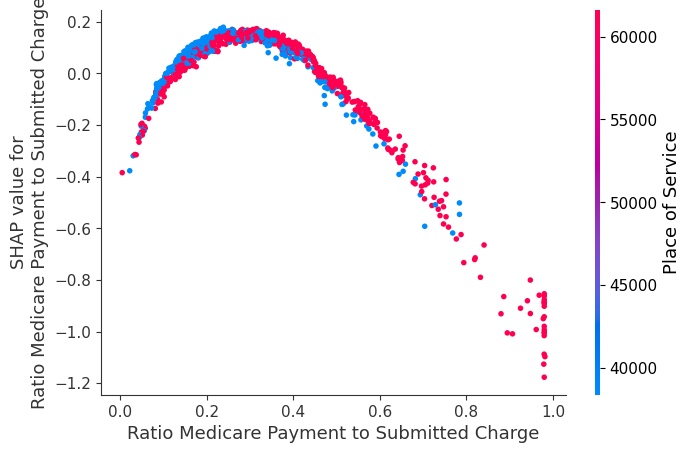

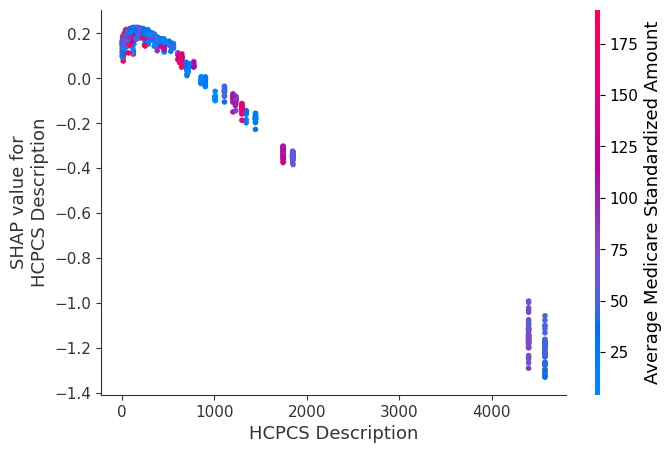

In [167]:
shap.dependence_plot("Ratio Medicare Payment to Submitted Charge", IF_shap_values, IFshap_X)
print('\n\n\n\n')
shap.dependence_plot("HCPCS Description", IF_shap_values, IFshap_X)

### Elliptical Envelope SHAP Analysis

In [168]:
# Define a function to wrap the model
def predict_wrapper(X):
    # EllipticEnvelope.score_samples() gives the anomaly score
    return -envelope.score_samples(X) 
# Return negative score as SHAP expects higher values for more important features

In [169]:
# Now use this wrapper function with SHAP
import shap
shap.initjs()

#Creating sample size to 1000
EEshap_X = shap.sample(df_freq_enc, 1000, random_state=18)

# Create an explainer with the wrapped function
EE_explainer = shap.Explainer(predict_wrapper, EEshap_X)

# Compute SHAP values
EE_shap_values = EE_explainer.shap_values(EEshap_X)

PermutationExplainer explainer: 1001it [00:25, 20.06it/s]                                                              


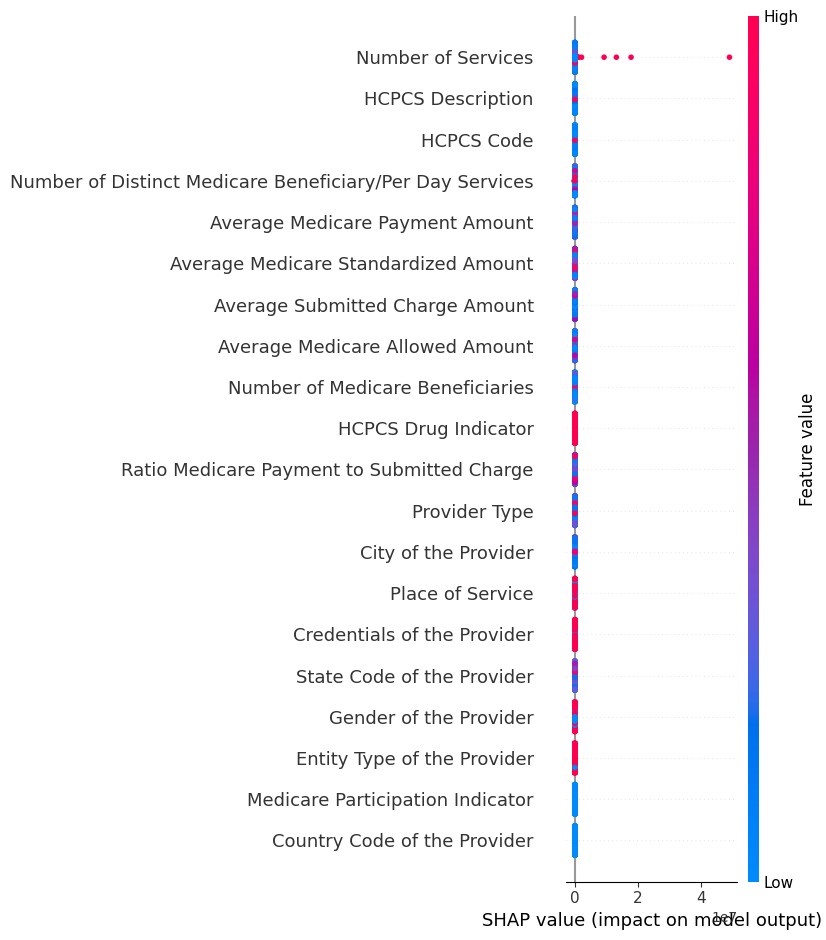

In [170]:
shap.summary_plot(EE_shap_values, EEshap_X)

<b>The "Number of Services" column has the highest positive impact on the output.</b>
<br><br>
<b>None of the attributes showing negative impact on the output.</b>

### SHAP Dependence Plots for particular features (Elliptic Envelope)

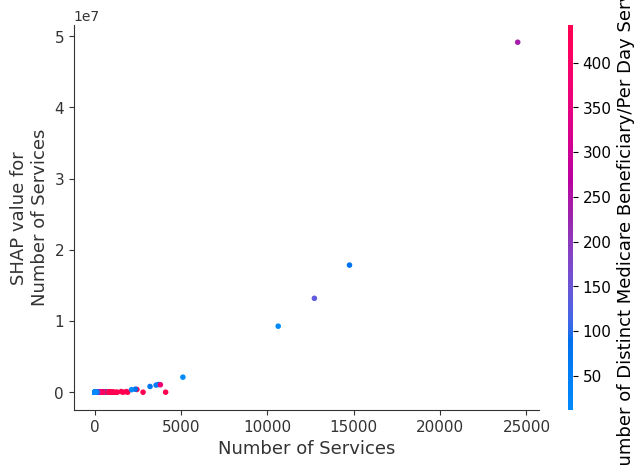

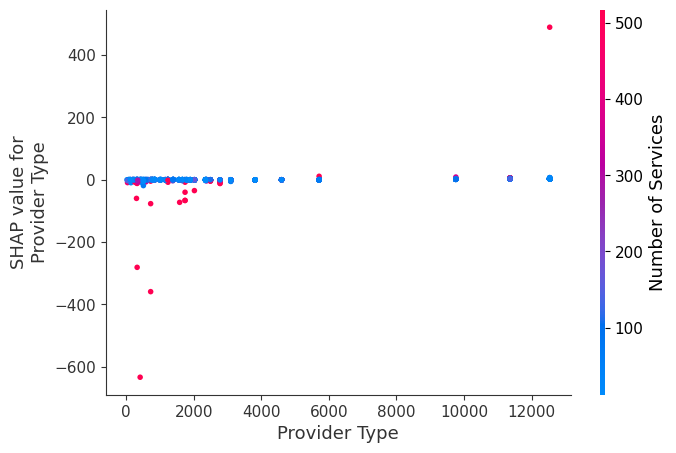

In [171]:
shap.dependence_plot("Number of Services", EE_shap_values, EEshap_X)
print('\n\n\n\n')
shap.dependence_plot("Provider Type", EE_shap_values, EEshap_X)

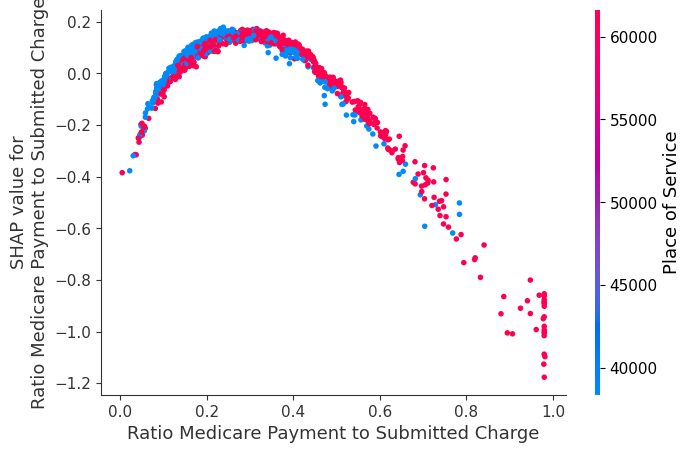

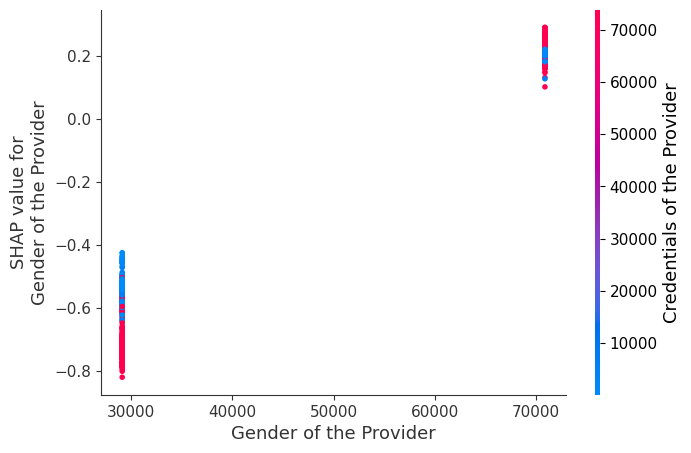

In [172]:
shap.dependence_plot("Ratio Medicare Payment to Submitted Charge", IF_shap_values, IFshap_X)
print('\n\n\n\n')
shap.dependence_plot("Gender of the Provider", IF_shap_values, IFshap_X)

### One Class SVM SHAP Analysis

In [173]:
# Define a function to wrap the model
def predict_wrapper_OCsvm(Xsvm):
    return -clf.score_samples(Xsvm)

<div class="alert alert-block alert-danger">
    <b>Note:</b> "Here, we are just creating a sample size of 100 since the running SHAP on SVM requires more resources and time as well.
</div>

In [174]:
import shap
shap.initjs()


# Creating a sample size of 100 for SHAP analysis
SVMshap_X = shap.sample(df_freq_enc, 500, random_state=18)


# Create an explainer with the wrapped function
SVM_explainer = shap.Explainer(predict_wrapper_OCsvm, SVMshap_X)

# Compute SHAP values
SVM_shap_values = SVM_explainer.shap_values(SVMshap_X)

PermutationExplainer explainer: 101it [05:30,  3.40s/it]                                                               


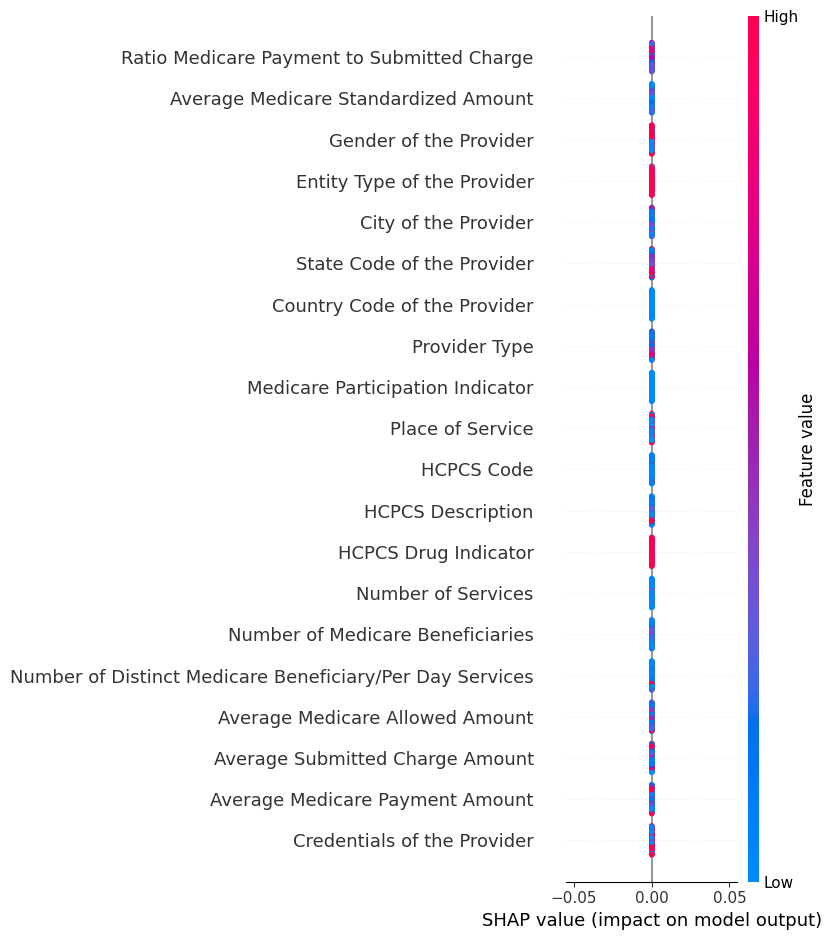

In [175]:
shap.summary_plot(SVM_shap_values, SVMshap_X)

<b>The "Ratio Medicare Payment to Submitted Charge" column has the strongest impact on the anomaly detection.</b>
<br><br>
<b>The "Credentials of the Provider" column has the weakest impact on the anomaly detection.</b>
<br><br>
<b><i>We can't conclude the overall impact of columns in One Class SVM as it analyzed very small sample.</i></b>

### SHAP Dependence Plots for particular features (One Class SVM)

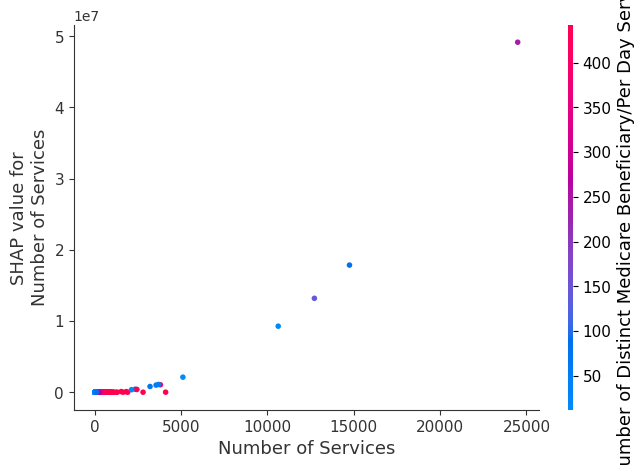

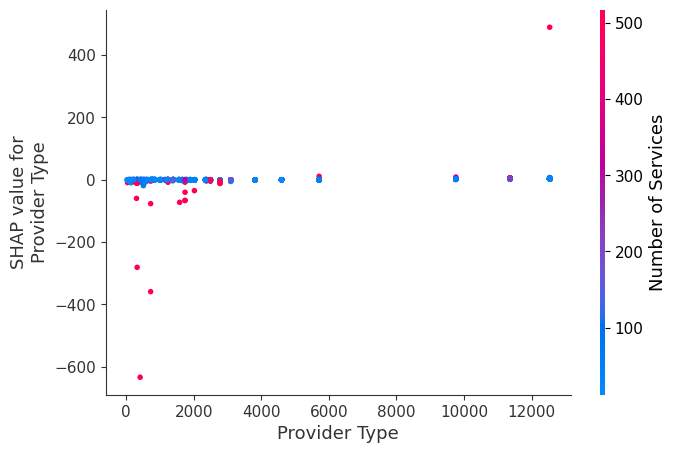

In [176]:
shap.dependence_plot("Number of Services", EE_shap_values, EEshap_X)
print('\n\n\n\n')
shap.dependence_plot("Provider Type", EE_shap_values, EEshap_X)

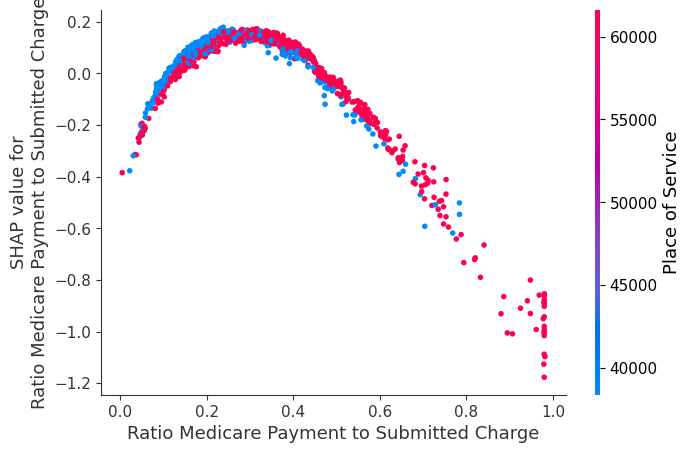

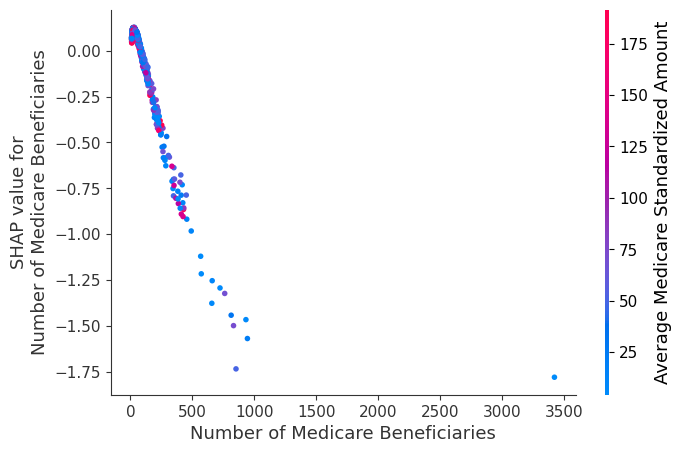

In [177]:
shap.dependence_plot("Ratio Medicare Payment to Submitted Charge", IF_shap_values, IFshap_X)
print('\n\n\n\n')
shap.dependence_plot("Number of Medicare Beneficiaries", IF_shap_values, IFshap_X)

# Conclusion:

### Isolation Forest:
#### The number of anomalies detected using Isolation Forest: 1000
#### The highest impacting column in Isolation Forest: Credentials of the Provider
#### The lowest impacting column in Isolation Forest: Country Code of the Provider

### Elliptic Envelope:
#### The number of anomalies detected using Elliptic Envelope: 1000
#### The highest impacting column in Elliptic Envelope: Number of Services
#### The lowest impacting column in Elliptic Envelope: Country Code of the Provider

### One Class SVM:
#### The number of anomalies detected using One Class SVM: 1002
#### The highest impacting column in One Class SVM: Ratio Medicare Payment to Submitted Charge
#### The lowest impacting column in One Class SVM: Credentials of the Provider
#### * The One Class SVM SHAP analysis can't be concluded for whole datset as sample was too small